In [21]:
import warnings
warnings.filterwarnings('ignore')

# Load data

In [22]:
root_dir = ".\mentalmanip-corpus\mentalmanip-corpus"

In [23]:
from convokit import Corpus

corpus = Corpus(root_dir)

corpus.print_summary_stats()

Number of Speakers: 5830
Number of Utterances: 19232
Number of Conversations: 2915


In [4]:
# random utterance

utt = corpus.random_utterance()
print(utt)

Utterance(id: '85515038__u2', conversation_id: 85515038__u0, reply-to: 85515038__u1, speaker: Speaker(id: '85515038__Person1', vectors: [], meta: ConvoKitMeta({'role_label': 'Person1'})), timestamp: 2, text: "Aww, naw, Amy, that won't be necessary. I shouldn't send it; she's just doing her job, I guess.", vectors: [], meta: ConvoKitMeta({'parsed': [{'rt': 0, 'toks': [{'tok': 'Aww', 'tag': 'NNP', 'dep': 'ROOT', 'dn': [1, 2, 5, 9, 11]}, {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 0, 'dn': []}, {'tok': 'naw', 'tag': 'NNS', 'dep': 'appos', 'up': 0, 'dn': [3, 4]}, {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 2, 'dn': []}, {'tok': 'Amy', 'tag': 'NNP', 'dep': 'appos', 'up': 2, 'dn': []}, {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 0, 'dn': []}, {'tok': 'that', 'tag': 'WDT', 'dep': 'nsubj', 'up': 9, 'dn': []}, {'tok': 'wo', 'tag': 'MD', 'dep': 'aux', 'up': 9, 'dn': []}, {'tok': "n't", 'tag': 'RB', 'dep': 'neg', 'up': 9, 'dn': []}, {'tok': 'be', 'tag': 'VB', 'dep': 'relcl', 'up': 0, 'dn

# Overview of manipulation techniques used

In [24]:
from collections import defaultdict

manipulated_conversations_map = {}
non_manipulated_conversations_map = []
manipulation_techniques_map = defaultdict(list)
vulnerability_map = defaultdict(list)


for convo in corpus.iter_conversations():
    convo_id = convo.id
    manipulated = convo.meta.get('manipulative')
    if manipulated == 1:
        manipulated_conversations_map[convo_id] = {
            'techniques': convo.meta.get('technique'),
            'vulnerabilities': convo.meta.get('vulnerability')
        }
    else:
        non_manipulated_conversations_map.append(convo_id)
        

    # Process techniques
    techniques = convo.meta.get('technique')
    if techniques:
        if isinstance(techniques, list):
            for tech in techniques:
                manipulation_techniques_map[tech].append(convo_id)
        else:
            manipulation_techniques_map[techniques].append(convo_id)

    # Process vulnerabilities
    vulnerabilities = convo.meta.get('vulnerability')
    if vulnerabilities:
        if isinstance(vulnerabilities, list):
            for vuln in vulnerabilities:
                vulnerability_map[vuln].append(convo_id)
        else:
            vulnerability_map[vulnerabilities].append(convo_id)


#  number of manipulated conversations
print("Number of manipulated conversations:", len(manipulated_conversations_map))
print("Number of non-manipulated conversations:", len(non_manipulated_conversations_map))
# number of conversations with each technique
print("*"*100)
print("Number of conversations with each technique:")
for tech, convos in manipulation_techniques_map.items():
    print(f"{tech}: {len(convos)}")
# number of conversations with each vulnerability
print("*"*100)
print("Number of conversations with each vulnerability:")
for vuln, convos in vulnerability_map.items():
    print(f"{vuln}: {len(convos)}")



Number of manipulated conversations: 2016
Number of non-manipulated conversations: 899
****************************************************************************************************
Number of conversations with each technique:
Rationalization: 213
Persuasion or Seduction: 607
Accusation: 361
Shaming or Belittlement: 384
Intimidation: 321
Playing Victim Role: 69
Playing Servant Role: 30
Evasion: 83
Brandishing Anger: 133
Denial: 87
Feigning Innocence: 58
****************************************************************************************************
Number of conversations with each vulnerability:
Dependency: 282
Naivete: 94
Low self-esteem: 155
Over-responsibility: 93
Over-intellectualization: 46


# Filter the corpus to process only the manipulated conversations

In [6]:
manipulative_conversations_corpus = corpus.filter_conversations_by(lambda convo: convo.meta.get('manipulative')==1)
manipulative_conversations_corpus.print_summary_stats()

Number of Speakers: 4032
Number of Utterances: 14555
Number of Conversations: 2016


# Fit the PromptTypeWrapper based on the data to learn the clusters

In [7]:
CLUSTER_COUNT = 8

In [8]:
from convokit.prompt_types import PromptTypeWrapper
pt = PromptTypeWrapper(n_types=CLUSTER_COUNT, random_state=1000, questions_only=False)
pt.fit(manipulative_conversations_corpus)


10000/14555 utterances processed
14555/14555 utterances processed
10000/14555 utterances processed
14555/14555 utterances processed
10000/14555 utterances processed
14555/14555 utterances processed
counting frequent itemsets for 28606 sets
	first pass: counting itemsets up to and including 5 items large
	first pass: 10000/28606 sets processed
	first pass: 20000/28606 sets processed
	second pass: counting itemsets more than 5 items large
making itemset tree for 109 itemsets
deduplicating itemsets
	counting itemset cooccurrences for 10000/26187 collections
	counting itemset cooccurrences for 20000/26187 collections
	finding supersets
10000/14555 utterances processed
14555/14555 utterances processed
fitting 9898 input pairs
fitting reference tfidf model
fitting prompt tfidf model
fitting svd model
fitting 8 prompt types


In [25]:
pt.summarize(corpus=manipulative_conversations_corpus, k=6)



TYPE 0
top prompt:
               0         1         2         3         4         5         6  \
see_*   0.561121  0.837300  0.892936  0.777027  0.902449  0.943981  1.140358   
now>*   0.575372  0.799818  1.005676  0.809659  0.943746  1.061071  1.105946   
tell_*  0.639111  0.765364  0.949996  0.805704  0.905636  0.983631  0.921549   
do>*    0.701002  0.803982  0.920970  0.825543  1.046274  0.924757  1.034076   
go_*    0.729630  0.863219  1.038778  0.794792  1.022128  1.131098  1.083892   
like_*  0.731182  0.851570  0.977871  0.998341  1.018111  1.002588  1.238093   

               7  type_id  
see_*   1.100851      0.0  
now>*   1.173341      0.0  
tell_*  1.018700      0.0  
do>*    1.097630      0.0  
go_*    1.106095      0.0  
like_*  1.116321      0.0  
top response:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, type_id]
Index: []
top prompts:
85516180__u6 Now that is a lie!  See how much you want to create a scandal in exchange for a glowing reputation and polite socie

# Transform based on the fitted model

In [10]:
manipulative_conversations_corpus_transformed = pt.transform(manipulative_conversations_corpus)
manipulative_conversations_corpus_transformed.print_summary_stats()


10000/14555 utterances processed
14555/14555 utterances processed
10000/14555 utterances processed
14555/14555 utterances processed
10000/14555 utterances processed
14555/14555 utterances processed
10000/14555 utterances processed
14555/14555 utterances processed
Number of Speakers: 4032
Number of Utterances: 14555
Number of Conversations: 2016


In [123]:
transformed_utt = manipulative_conversations_corpus_transformed.random_utterance()
transformed_utt.meta

ConvoKitMeta({'parsed': [{'rt': 4, 'toks': [{'tok': 'Look', 'tag': 'VB', 'dep': 'advcl', 'up': 4, 'dn': []}, {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 4, 'dn': []}, {'tok': 'I', 'tag': 'PRP', 'dep': 'nsubj', 'up': 4, 'dn': []}, {'tok': "'m", 'tag': 'VBP', 'dep': 'aux', 'up': 4, 'dn': []}, {'tok': 'talking', 'tag': 'VBG', 'dep': 'ROOT', 'dn': [0, 1, 2, 3, 5, 10]}, {'tok': 'about', 'tag': 'IN', 'dep': 'prep', 'up': 4, 'dn': [8]}, {'tok': 'a', 'tag': 'DT', 'dep': 'det', 'up': 8, 'dn': []}, {'tok': 'business', 'tag': 'NN', 'dep': 'compound', 'up': 8, 'dn': []}, {'tok': 'deal', 'tag': 'NN', 'dep': 'pobj', 'up': 5, 'dn': [6, 7, 9]}, {'tok': 'here', 'tag': 'RB', 'dep': 'advmod', 'up': 8, 'dn': []}, {'tok': '.', 'tag': '.', 'dep': 'punct', 'up': 4, 'dn': [11]}, {'tok': ' ', 'tag': '_SP', 'dep': 'dep', 'up': 10, 'dn': []}]}, {'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP', 'dep': 'nsubj', 'up': 1, 'dn': []}, {'tok': 'buy', 'tag': 'VBP', 'dep': 'ROOT', 'dn': [0, 3, 7, 8, 29]}, {'tok': 'the', '

# Preview the transformed data

In [11]:
def get_manipulation_techniques(convo_id):
    """
    Returns a list of manipulation techniques used in a given conversation ID.
    """
    techniques = manipulated_conversations_map[convo_id]['techniques']
    return techniques

In [19]:
for i, utterance in enumerate(manipulative_conversations_corpus_transformed.iter_utterances()):
    if i >= 25:
        break
    convo_id = utterance.conversation_id
    utt_id = utterance.id
    manipulation_techniques = get_manipulation_techniques(convo_id)
    text = utterance.text
    arcs = utterance.meta.get('arcs')
    prompt_type = utterance.meta.get(f"prompt_types__prompt_type__{CLUSTER_COUNT}")
    print("Conversation: ", convo_id)
    print("Utterance: ", utt_id)
    print("Manipulation Techniques: ", manipulation_techniques)
    print("Cluster Number: ", prompt_type)
    print("*"*100)

Conversation:  85514414__u0
Utterance:  85514414__u0
Manipulation Techniques:  []
Cluster Number:  4.0
****************************************************************************************************
Conversation:  85514414__u0
Utterance:  85514414__u1
Manipulation Techniques:  []
Cluster Number:  None
****************************************************************************************************
Conversation:  85514414__u0
Utterance:  85514414__u2
Manipulation Techniques:  []
Cluster Number:  1.0
****************************************************************************************************
Conversation:  85514414__u0
Utterance:  85514414__u3
Manipulation Techniques:  []
Cluster Number:  None
****************************************************************************************************
Conversation:  85514414__u0
Utterance:  85514414__u4
Manipulation Techniques:  []
Cluster Number:  1.0
*******************************************************************************

# Compare the relationship between the prompt-type clusters and manipulation techniques

In [13]:
import pandas as pd

rows = []
for utt in manipulative_conversations_corpus_transformed.iter_utterances():
    convo_id = utt.conversation_id
    prompt_type = utt.meta.get(f"prompt_types__prompt_type__{CLUSTER_COUNT}")
    manip = get_manipulation_techniques(convo_id)  
    rows.append({
        "conversation_id": convo_id,
        "prompt_type": prompt_type,
        "manipulation": manip
    })

utt_df = pd.DataFrame(rows)
utt_df["prompt_type"] = utt_df["prompt_type"].fillna("UNK").astype(str)

# Filter out '-1' and 'UNK' prompt types
utt_df = utt_df[~utt_df["prompt_type"].isin(["-1.0", "UNK"])]

# Aggregate utterance-level prompt_types into proportions per conversation
conv_cluster_prop = (
    utt_df.groupby("conversation_id")["prompt_type"]
          .value_counts(normalize=True)
          .unstack(fill_value=0)
)

# Attach manipulation labels (one list per conversation)
manip_series = utt_df.groupby("conversation_id")["manipulation"].first()

# Final conversation-level dataframe
conv_df = conv_cluster_prop.join(manip_series)

print(conv_df.head())


                  0.0       1.0       2.0       3.0       4.0   5.0  6.0  7.0  \
conversation_id                                                                 
85514414__u0     0.00  0.666667  0.000000  0.000000  0.333333  0.00  0.0  0.0   
85514415__u0     0.25  0.000000  0.250000  0.500000  0.000000  0.00  0.0  0.0   
85514416__u0     0.00  0.666667  0.166667  0.166667  0.000000  0.00  0.0  0.0   
85514417__u0     0.25  0.250000  0.125000  0.125000  0.250000  0.00  0.0  0.0   
85514418__u0     0.00  0.250000  0.250000  0.250000  0.000000  0.25  0.0  0.0   

                                            manipulation  
conversation_id                                           
85514414__u0                                          []  
85514415__u0                           [Rationalization]  
85514416__u0       [Persuasion or Seduction, Accusation]  
85514417__u0     [Shaming or Belittlement, Intimidation]  
85514418__u0                   [Persuasion or Seduction]  


In [14]:
# explode conv_df into one row per technique
expanded = conv_df.reset_index().explode('manipulation')
expanded['manipulation'] = expanded['manipulation'].fillna('None')

# group and compute means
cluster_cols = [c for c in conv_df.columns if c != 'manipulation']
group_means = expanded.groupby('manipulation')[cluster_cols].mean()


In [15]:
print(group_means.head(10))  # see first techniques with their cluster averages


                              0.0       1.0       2.0       3.0       4.0  \
manipulation                                                                
Accusation               0.129517  0.361723  0.080383  0.119054  0.152309   
Brandishing Anger        0.116681  0.422276  0.080295  0.132122  0.112349   
Denial                   0.140665  0.271220  0.076138  0.094265  0.278139   
Evasion                  0.117056  0.365202  0.091809  0.073122  0.200564   
Feigning Innocence       0.092773  0.299193  0.043617  0.143390  0.128189   
Intimidation             0.138160  0.416382  0.109093  0.122518  0.079550   
None                     0.134552  0.368777  0.077754  0.122019  0.141323   
Persuasion or Seduction  0.122527  0.431278  0.086488  0.136256  0.088415   
Playing Servant Role     0.059203  0.461361  0.065895  0.165332  0.088486   
Playing Victim Role      0.158458  0.403084  0.050392  0.129303  0.112114   

                              5.0       6.0       7.0  
manipulation       

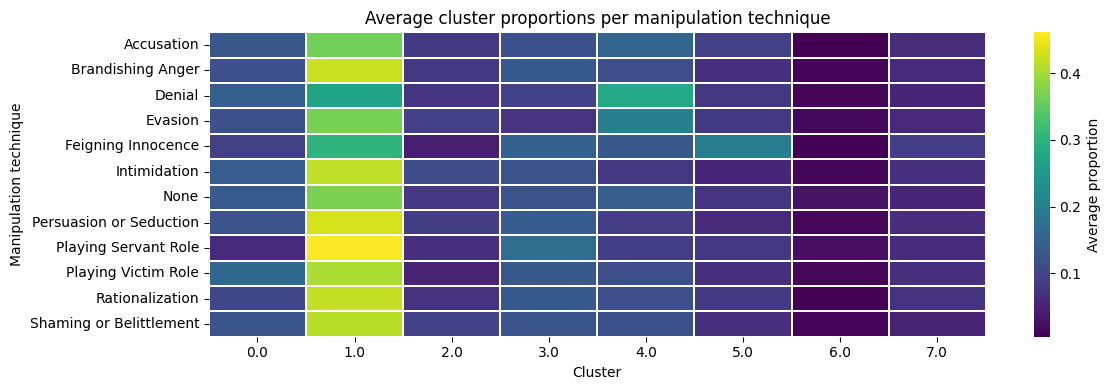

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, max(4, 0.25 * len(group_means))))
sns.heatmap(group_means, cmap='viridis', cbar_kws={'label': 'Average proportion'}, linewidths=0.3)
plt.xlabel('Cluster')
plt.ylabel('Manipulation technique')
plt.title('Average cluster proportions per manipulation technique')
plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import kruskal

for cluster in group_means.columns:
    # collect values for each technique
    samples = [expanded.loc[expanded['manipulation']==tech, cluster].dropna().values
               for tech in expanded['manipulation'].unique()]
    # keep only groups with >=2 samples
    samples = [s for s in samples if len(s) > 1]
    if len(samples) > 1:
        stat, p = kruskal(*samples)
        print(f"{cluster}: H={stat:.2f}, p={p:.4f}")


0.0: H=9.49, p=0.5770
1.0: H=51.09, p=0.0000
2.0: H=13.82, p=0.2431
3.0: H=17.90, p=0.0840
4.0: H=91.75, p=0.0000
5.0: H=33.78, p=0.0004
6.0: H=25.71, p=0.0072
7.0: H=11.46, p=0.4056
